*Thank you for opening this kernel!*


# Predicting Fetal Health Classification:
> In this work, we use machine learning for the prediction of fetal health to prevent child and maternal mortality.

## PROJECT CONTENT:
* Import Necessary Libraries
* Data Exploration/ Analysis/ Visualization
* Correlation & Correlation Matrix
* Predictive Modeling 
* Confusion Matrix
* Precision and Recall
* Hyperparameters Tuning

## Goal:
> The goal of this competition is to predict Fetal Health. We will practice Classification Algorithms to achieve the lowest prediction error.

## Machine learning methods:
I have applied consolidated methodologies to identify the most suitable machine learning model for the task from a pool of candidate methodologies.
I have taken into consideration a pool of four state-of-the-art machine learning models, that are briefly reviewed in the following:
* **Logistic Regression (LR)**: is the baseline model in this Kernel.

**NOTE: The key advantages of LR are its simplicity, the scalability to very large datasets and the interpretation it provides in terms of how unitary changes in an input feature influence the log-odds of the associated linear parameter. **

* **K-nearest neighbors (KNN)**: k-Nearest Neighbor is a memory-based model, where predictions are performed by the similarity of the current sample to k nearest elements in the training set, according to the given distance metric. 

**NOTE: The key advantage of this method lies in its sheer simplicity, compensated by the difficulties in robustly determining the most appropriate similarity function as well as the choice of the k meta-parameter. **

* **Random Forest (RF)**: is a type of ensemble methods in which multiple learning models are combined together to improve generalization.

* **Gradient Boosting Machine (GBM)**: is another ensemble method combining a series of weak learners to obtain a stronger predictor.

The **rationale** behind this selection of candidate models was to provide reasonable coverage of different methodologies, to achieve the lowest prediction error.

## Import Necessary Libraries and Data Sets.

In [1]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

fetal-health-classification



In [2]:
# Load Dataset
data = pd.read_csv('../input/fetal-health-classification/fetal_health.csv')

## Exploratory Data Analysis (EDA) and Analysis
In this step we want to get basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [3]:
# Print the first 5 rows of the dataframe.

data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [5]:
# Analyse statically insight of data
data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

**DataFrame.describe()** method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. 

Now, let's understand the statistics that are generated by the describe() method:
* Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
* Mean tells us the mean value of that feature.
* Std tells us the Standard Deviation Value of that feature.
* Min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* Max tells us the maximum value of that feature.

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**DataFrame.info()** method prints a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


Property **DataFrame.shape** returns a tuple representing the dimensionality of the DataFrame.

## Count the missing and null values
Here is good to count the **missing** and **null** values.
In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That’s why we use some imputation techniques to replace the NaN values with some probable values.

In [8]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


As the result, In this case, there is *neither null values nor missing values* in the dataset.

## Visualize missing values (NaN) using Missingno Library:
We use **Missingno library** which offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.
 

## Bar Chart :
This bar chart gives us an idea about how many missing values are there in each column. 

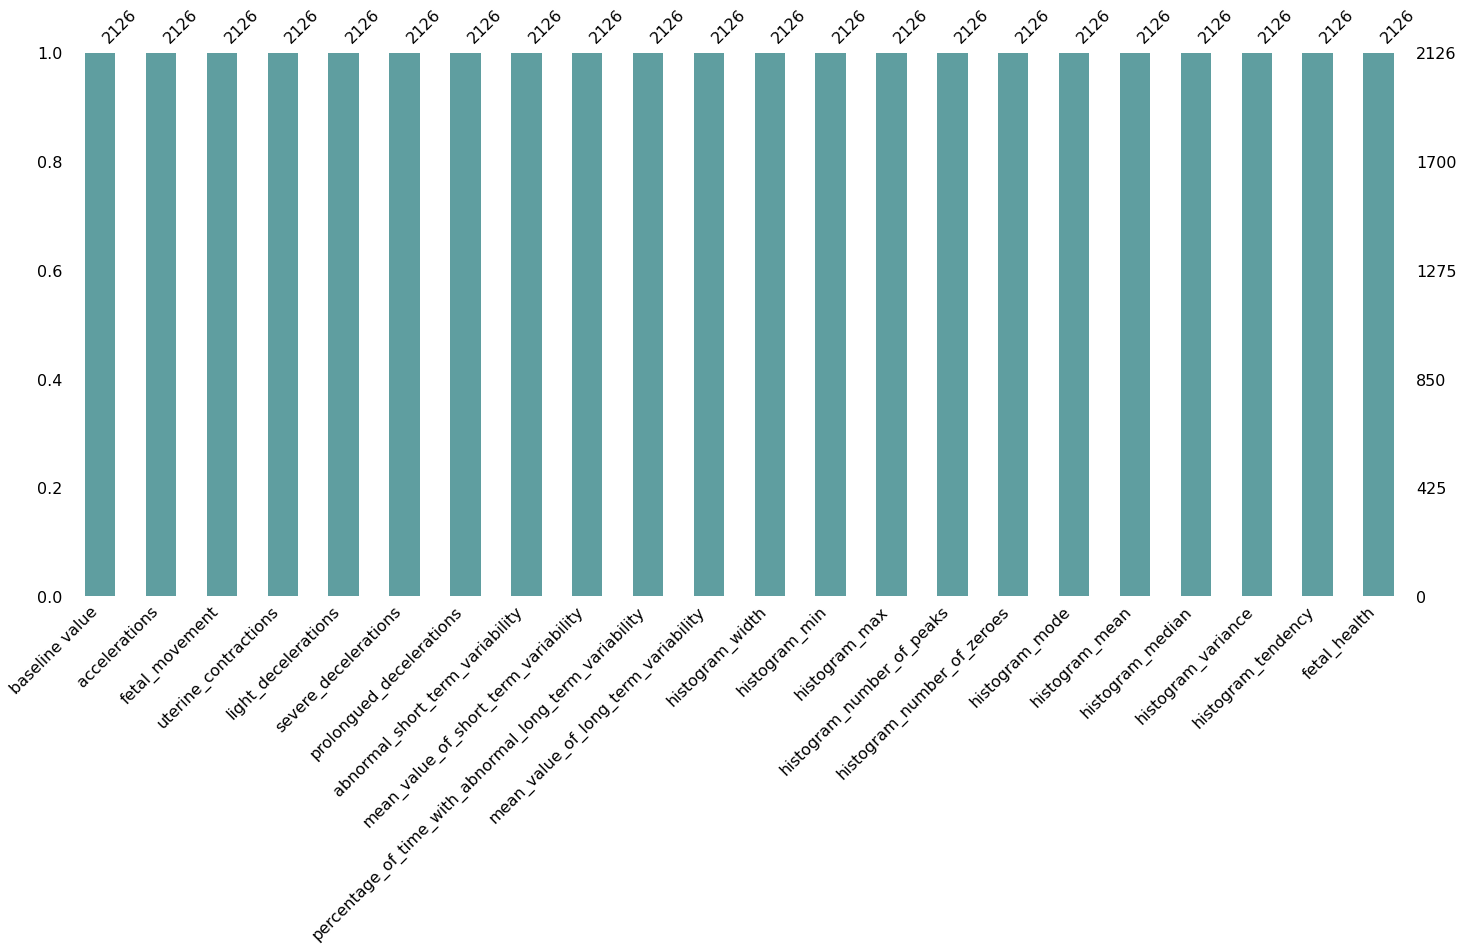

In [9]:
# Null count analysis
null_plot = msno.bar(data, color = "#5F9EA0")

## The **principle** of this challenge is: 
> Classify fetal health in order to prevent child and maternal mortality. So get the info about the column of "fetal_health" which were classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

To do so, we're gonna **analyze and visualize** the target column (fetal_health).

## Analyze and visualize the target column (fetal_health)

We use the **describe() method** for our target column to show the descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [10]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Data visualizations of **"fetal_health"** column makes easier to understand the fetal state, and visualization also makes it easier to detect patterns of the fetal state (Normal, Suspect, Pathological). 

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


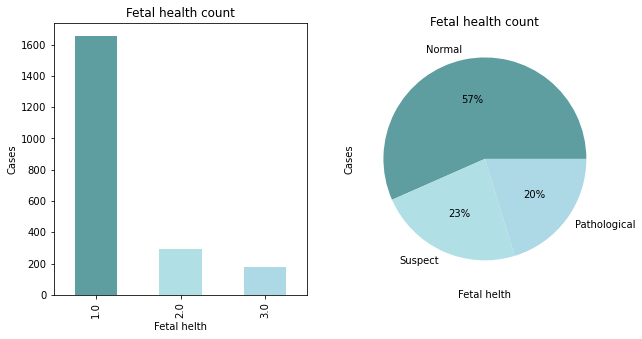

In [11]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

Data visualizations of "fetal_health" column shows us the percentage of fetal health state. 

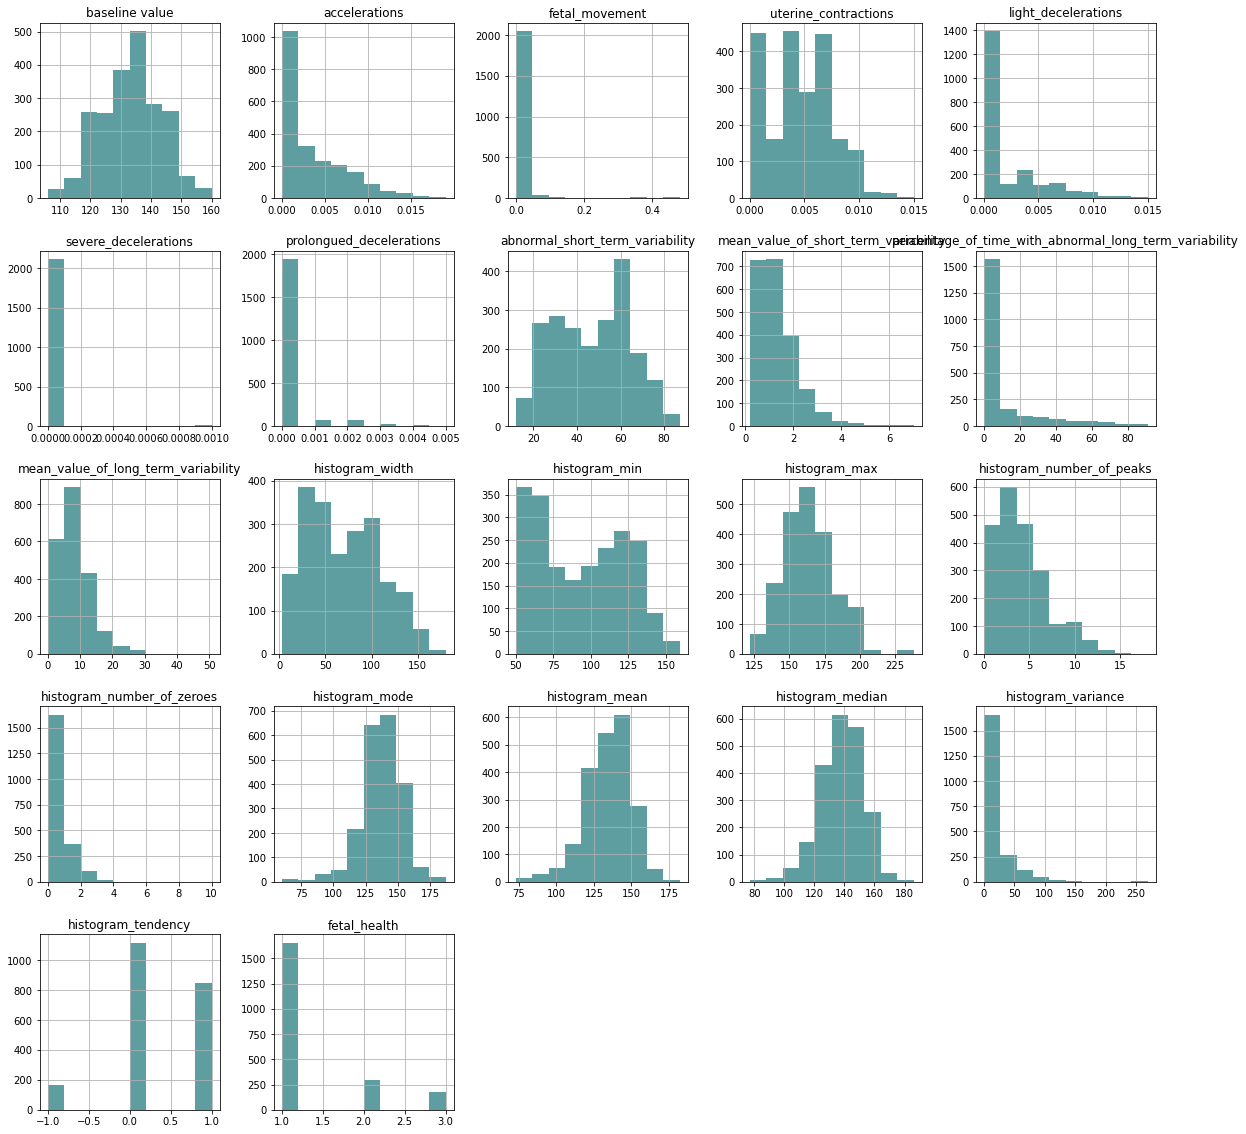

In [12]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

## The important things we could learn about the above plot is Skewness.  Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. There are three types of skewed distributions. A right (or positive) skewed distribution, left (or negative) skewed distribution, and normal distribution.
* A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
* A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
* The skewness for a normal distribution is zero and looks a bell curve.

## Correlation Numeric featurs with output variable(fetal_health)
*Correlation & Correlation Matrix*

Here, we want to show the correlation between numerical features and the target "fetal_health", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see some features have the dark colors, Those features have high correlation with the target.

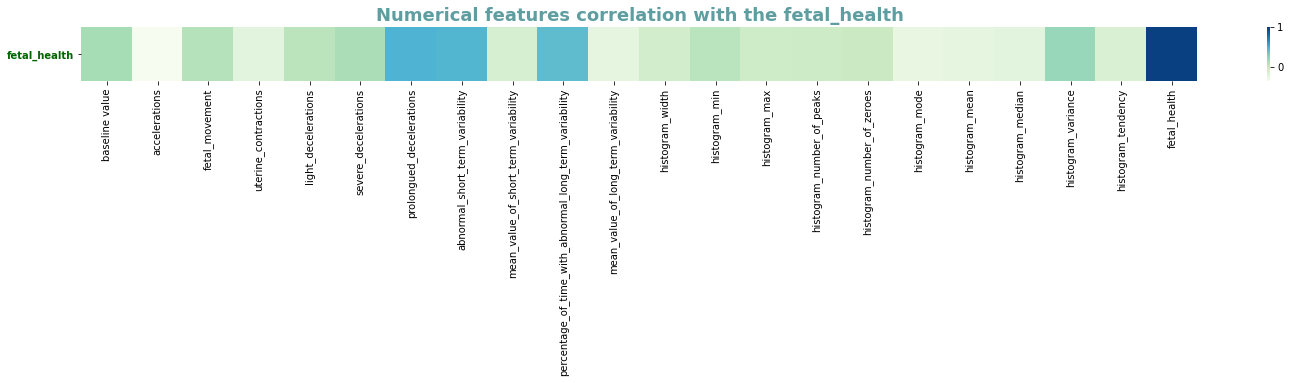

In [13]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [14]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

### We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health).

## Scatter matrix
> A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart. 

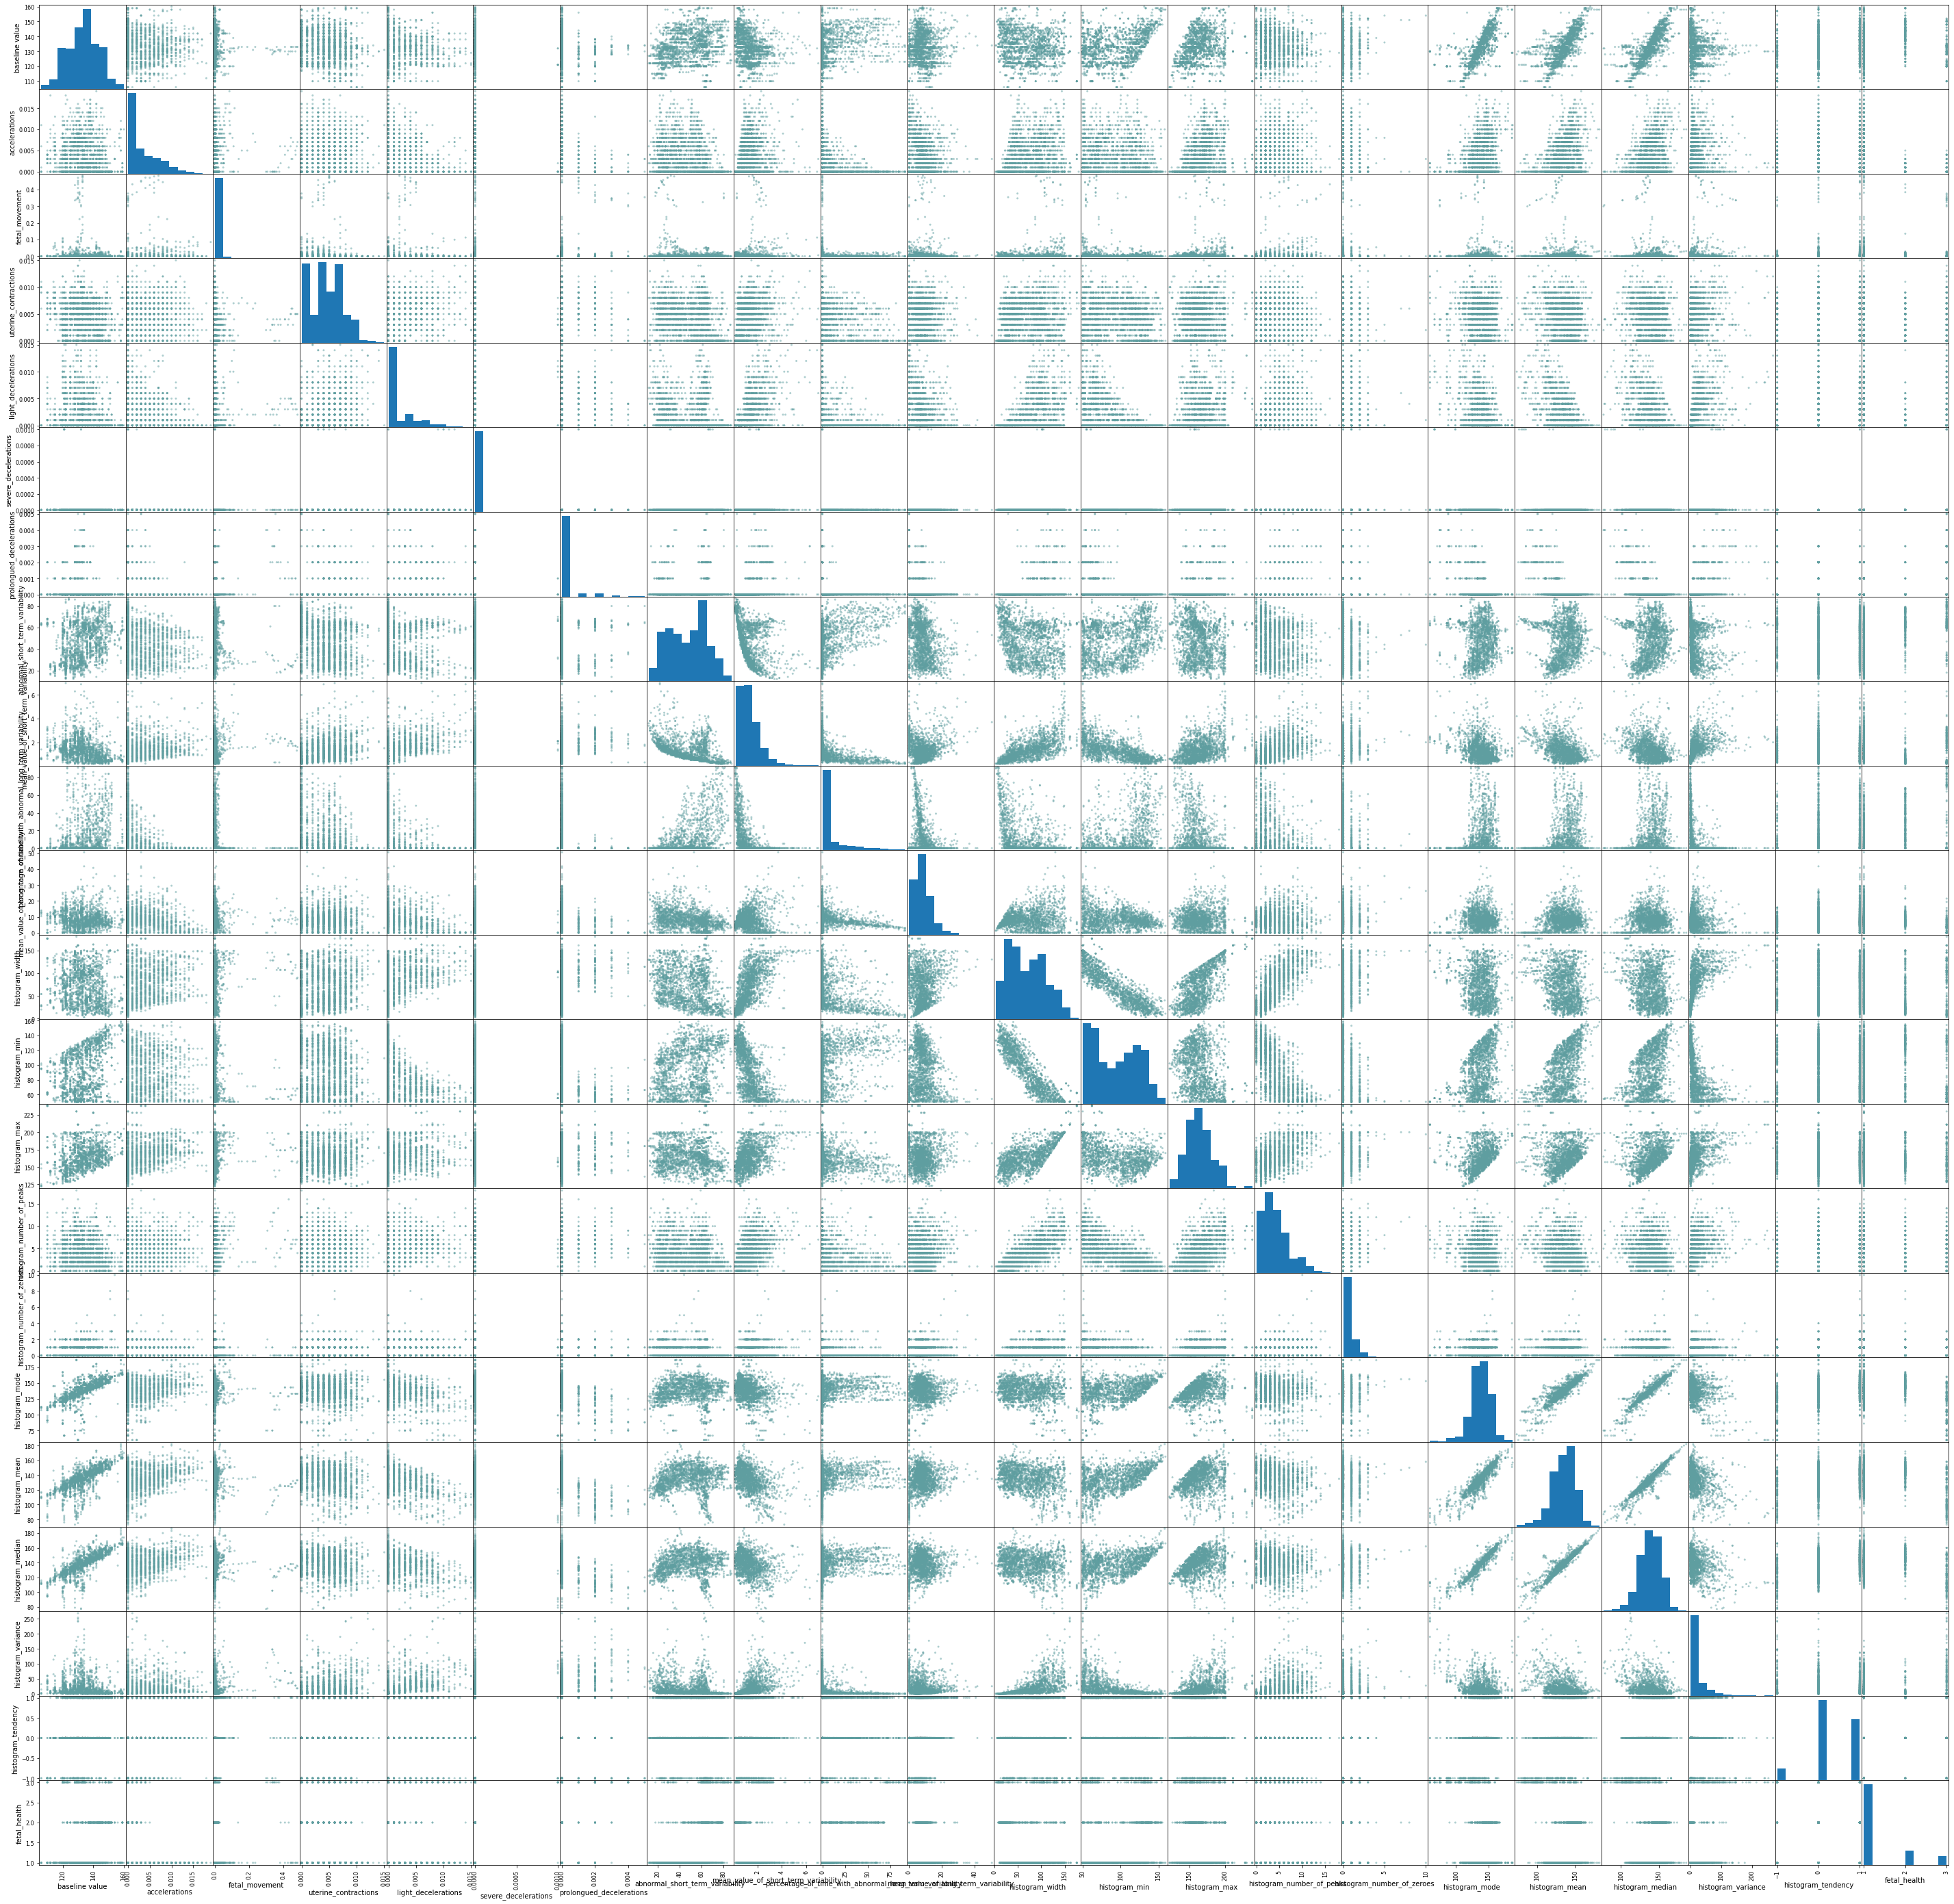

In [15]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(data,figsize=(50, 50), color = "#5F9EA0")

## Heatmap
> A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

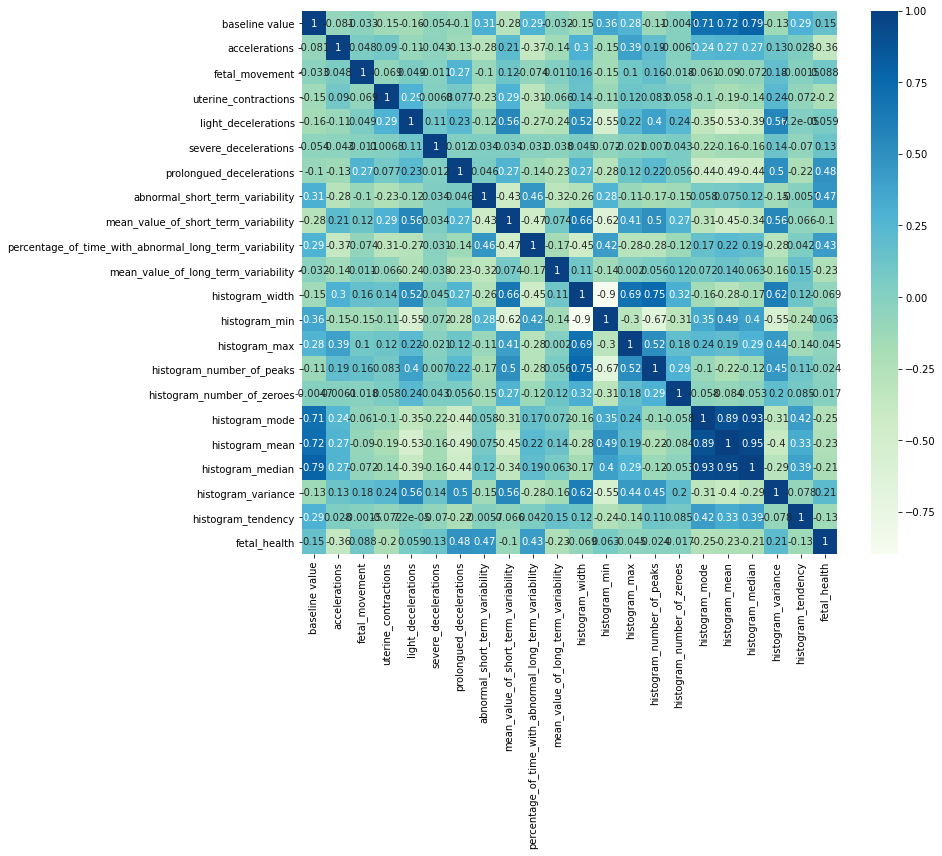

In [16]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")  

# Scaling the data
> Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.

![](https://pariaagharabi.github.io/images/fetal-health-image.png)

*NOTE*: 
> To learn more about scaling techniques: [](http://)https://towardsdatascience.com

In [17]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [18]:
X.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.352220      -0.822388        -0.20321             -1.482465   
1       -0.132526       0.730133        -0.20321              0.554627   
2       -0.030884      -0.046128        -0.20321              1.233657   
3        0.070757      -0.046128        -0.20321              1.233657   
4       -0.132526       0.988886        -0.20321              1.233657   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638438             -0.057476                 -0.268754   
1             0.375243             -0.057476                 -0.268754   
2             0.375243             -0.057476                 -0.268754   
3             0.375243             -0.057476                 -0.268754   
4            -0.638438             -0.057476                 -0.268754   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.513190                             -0.943095   
1                        -1.744751                              0.868841   
2                        -1.802928                              0.868841   
3                        -1.802928                              1.208579   
4                        -1.802928                              1.208579   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                           1.802542       ...   
1                                          -0.535361       ...   
2                                          -0.535361       ...   
3                                          -0.535361       ...   
4                                          -0.535361       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.165507      -1.068562      -2.119592                  -0.701397   
1         1.529124      -0.865539       1.893794                   0.655137   
2         1.529124      -0.865539       1.893794                   0.316003   
3         1.195333      -1.373097       0.333033                   2.350804   
4         1.195333      -1.373097       0.333033                   1.672537   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.458444       -1.065614        0.153270   
1                    0.958201        0.216638        0.089126   
2                    0.958201        0.216638        0.024982   
3                   -0.458444       -0.027600       -0.039162   
4                   -0.458444       -0.027600        0.089126   

   histogram_median  histogram_variance  histogram_tendency  
0         -1.181642            1.870569            1.112980  
1          0.132038           -0.234998           -0.524526  
2         -0.006244           -0.200481           -0.524526  
3         -0.075385           -0.200481            1.112980  
4         -0.006244           -0.269516            1.112980  

[5 rows x 21 columns]

In [19]:
y = data["fetal_health"]

## Test Train Split and Cross Validation methods
* **Train Test Split** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.
* **Cross-validation**, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.


In [20]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## Building Machine Learning Models:
1. Logistic Regression (LR)
2. K-nearest neighbors (KNN)
3. Random Forest (RF)
4. Gradient Boosting Machine (GBM)

NOTE: To improve all scores for each ML model, we want to search the set of "hyperparameters" by using the common approach "Grid search" for four models above. 
**Hyper-parameters** are a set of additional, model-dependent parameters that are not inferred automatically by the learning algorithm but need to be specified before the learning phase: a common example of **hyper-parameter** is the value of k in k-Nearest Neighbor or the number of hidden units in a Neural Network. 
Hence, finding sub-optimal values of the hyper-parameters is crucial to ensure proper generalization. *The hyper-parameter optimization procedure*, which was repeated separately for each candidate learning methodology, encompassed the following steps: 
* Firstly, a set of suitable hyper-parameters to optimize was identified; for each of them, a range of candidate values was specified. These choices are dependent both on our expertise and on the computational cost needed to train the models. 
* Secondly, a predictor was learned for all the possible combinations of hyper-parameters and its out-of-sample performance was estimated using 5-fold Cross Validation (CV), i.e. 
We trained the model with 70% of the total training set size and validated its performance in the remaining 30%. 

**GridSearch** exhaustively searches through all possible combinations of hyperparameters during training the phase. Before we proceed further, we shall cover another cross-validation (CV) methods since tuning hyperparameters via grid search is usually cross-validated to avoid overfitting.
Hence, For accelerating the running GridSearchCV we set: n-splits=3, n_jobs=2.

<br><br>

## Logistic Regression (LR)

In [22]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


### Here, we are going to tune the baseline model to boost the model.

In [23]:
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

In [24]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.90927419 0.89717742 0.88306452]
CrossValMeans: 0.897
CrossValStandard Deviation: 0.011


In [25]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [26]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [27]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    8.8s finished


In [28]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=10)


In [29]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


In [30]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.899


Base on the result above, after tuning our model (LR), We could boost the model just a little bit. So we keep going with other models.

In [31]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [32]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.138
Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on training set = 0.907
R^2(coefficient of determination) on testing set = 0.886


## Model Performance Analysis

* **Classification Report:** Report which includes Precision, Recall and F1-Score.


1. **Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

    Precision = TP/TP+FP

2. **Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

    Recall = TP/TP+FN    

3. **F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

    F1 Score = 2(Recall Precision) / (Recall + Precision)

In [33]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



* **Confusion Matrix**:
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.


In [34]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


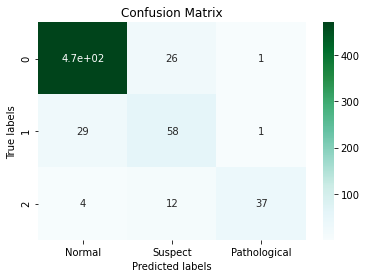

In [35]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<br><br>

## K-Nearest Neighbors (KNN)

In [36]:
# Baseline model of K-Nearest Neighbors with default parameters:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)


Baseline K-Nearest Neighbors: 0.876


### Here, we are going to tune the baseline model to boost the model.

In [37]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.90927419 0.89717742 0.89717742]
CrossValMeans: 0.901
CrossValStandard Deviation: 0.006


In [38]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [39]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [40]:
# Fit model with train data
GridSearchCV_knn.fit(X_train, y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3480 out of 3480 | elapsed:  4.6min finished


In [41]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")

Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)


In [42]:
best_params_knn = GridSearchCV_knn.best_params_
print(f"Best parameter values:\n{best_params_knn}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


In [43]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for GNB model: {round(best_score_knn, 3)}")

Best score for GNB model: 0.909


In [44]:
# Test with new parameter for KNN model
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

In [45]:
print(f"Mean Square Error for K_Nearest Neighbor  = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Mean Square Error for K_Nearest Neighbor  = 0.132
Root Mean Square Error for K_Nearest Neighbor = 0.363
R^2(coefficient of determination) on training set = 0.956
R^2(coefficient of determination) on testing set = 0.897


In [46]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.66      0.66      0.66        88
         3.0       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.89       638



In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Confusion Matrix:
[[478  18   1]
 [ 26  58   4]
 [  5  12  36]]


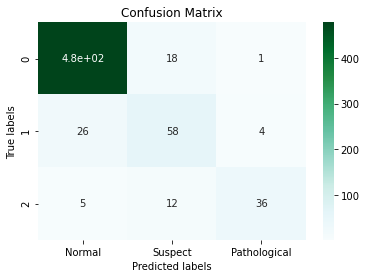

In [48]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<br><br>

## Random Forest (RF)

In [49]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.923


In [50]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.94959677 0.93346774 0.93951613]
CrossValMeans: 0.941
CrossValStandard Deviation: 0.007


In [51]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [52]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [53]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   52.1s finished


In [54]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(min_samples_split=6, n_estimators=400)


In [55]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 400}


In [56]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.943


In [57]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [58]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.1
Root Mean Square Error for Random Forest = 0.317
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.928


In [59]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.80      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638



In [60]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[482  11   4]
 [ 21  64   3]
 [  2   5  46]]


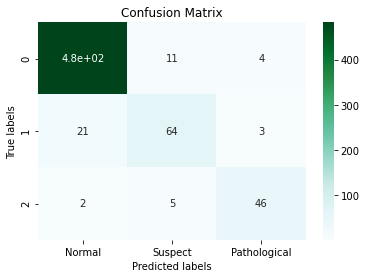

In [61]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<br><br>

## Gradient Boosting classifier (GBC)


In [62]:
# Baseline model of gradient boosting classifier with default parameters:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


In [63]:
# Cross validate Gradient Boosting Classifier model
scores_GBC = cross_val_score(gbc, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.96169355 0.93346774 0.94153226]
CrossValMeans: 0.946
CrossValStandard Deviation: 0.012


## Tuning parameters
Many strategies exist on how to tune parameters. Most data scientist see **number of trees, tree depth and the learning rate** as most crucial parameters.
* **Number of trees**: A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.
* **Learning rate**: Determines the contribution of each tree on the final outcome and controls how quickly the algorithm proceeds down the gradient descent (learns). This hyperparameter is also called shrinkage. Generally, the smaller this value, the more accurate the model can be but also will require more trees in the sequence.
* **Tree depth**: Controls the depth of the individual trees. Typical values range from a depth of 3–8 but it is not uncommon to see a tree depth of 1.

Parameter tuning is a crucial task in finding the model with the highest predictive power. The code below how to tune parameters in a gradient boosting model for classification.

It's hyperparameter tuning time. First, we need to define a dictionary of GBC parameters for the grid search.

In [64]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

Second, we pass the GradientBoostingClassifier() and params_GBC as the model and the parameter dictionary into the GridSearchCV function.


In [65]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=params_GBC, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [66]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 126 out of 126 | elapsed:  8.4min finished


In [67]:
# Get the best estimator values.
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

Best estimator values for GBC model:
GradientBoostingClassifier(n_estimators=500)


In [68]:
# Get the best parameter values.
best_params_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_params_GBC}")

Best parameter values for GBC model:
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}


In [69]:
# Best score for GBC by using the best_score attribute.
best_score_GBC = GridSearchCV_GBC.best_score_
print(f"Best score value foe GBC model: {round(best_score_GBC, 3)}")

Best score value foe GBC model: 0.951


In [70]:
# Test with new parameter for GBC model
gbc = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=1, loss="deviance", max_depth=5, max_features="log2", min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200, random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

In [71]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.149
Root Mean Square Error for Gradient Boosting Classifier = 0.386
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.898


In [72]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       497
         2.0       0.69      0.69      0.69        88
         3.0       0.78      0.68      0.73        53

    accuracy                           0.90       638
   macro avg       0.80      0.78      0.79       638
weighted avg       0.90      0.90      0.90       638



In [73]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[476  15   6]
 [ 23  61   4]
 [  4  13  36]]


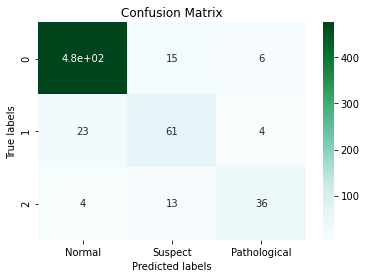

In [74]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## Plotting the learning curve
* Learning curves are plots that show changes in learning performance over time in terms of experience.
* Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.
* Learning curves of model performance can be used to diagnose whether the train or validation datasets are not relatively representative of the problem domain.

In [75]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Result Visualisation of the learning curve

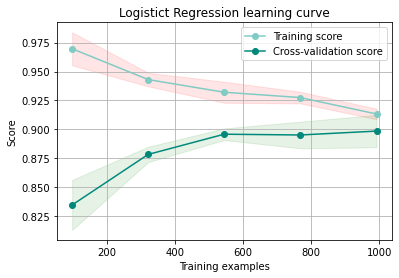

In [76]:
# Logistic Regression
plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistict Regression learning curve", x = X_train, y = y_train, cv = cv_method);

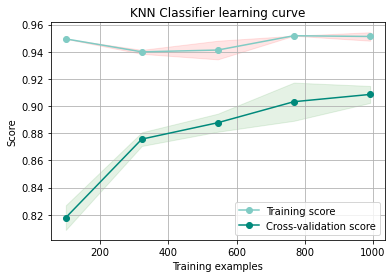

In [77]:
plot_learning_curve(GridSearchCV_knn.best_estimator_,title = "KNN Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

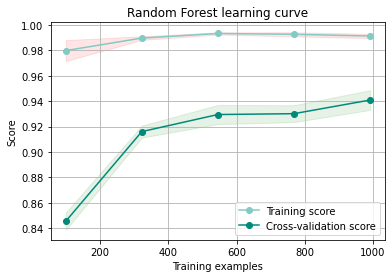

In [78]:
# Random forest
plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train, y = y_train, cv = cv_method);

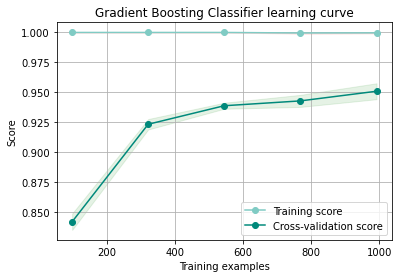

In [79]:
# Gradient Boosting Classifier
plot_learning_curve(GridSearchCV_GBC.best_estimator_,title = "Gradient Boosting Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

## Model Selection


In [80]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "KNN",
                                  "Random Forest",
                                  "Gradient Boosting Classifier"],
                        "Score": [logistic_regression_mod.score(X_train, y_train),
                                  knn_mod.score(X_train, y_train),
                                  random_forest_mod.score(X_train, y_train),
                                  gbc_mod.score(X_train, y_train),
                                    ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

Model
Score                                 
0.999328                 Random Forest
0.997984  Gradient Boosting Classifier
0.956317                           KNN
0.906586           Logistic Regression

The results of the model selection phase are summarized in Table above. The Random Forest with 0.99 score has high percentage among models. Logistic Regression has lowest score (0.90).

Thank you for taking the time to read through my kernel. For the moment, let me know if you found this notebook useful or you just liked it: I would really appreciate it!